<a href="https://colab.research.google.com/github/Sarper447/deneme/blob/main/calisma_07_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import os

print(tf.__version__)

2.8.0


In [ ]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)


epochs = 10

In [ ]:
base_dir = "../content/drive/MyDrive/Colab Notebooks/calisma_23_04/tomato_new"
train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"valid")

#(train_images, train_labels), (test_images, test_labels) = base_dir.load_data()


In [ ]:
class_names = ['bacterial_spot', 'Late_blight','healthy']

In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             class_mode = "categorical")

Found 72 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create a classes index file

In [ ]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Late_blight': 0, 'bacterial_spot': 1, 'healthy': 2}


In [ ]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_data.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')

/content/class_indices.json

training


In [ ]:
base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False,
                                             input_shape = input_shape)

base_model.trainable = False

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape = input_shape)

x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(categories), 
                          activation="softmax")(x)

model = keras.Model(inputs = inputs, 
                    outputs = x, 
                    name="LeafDisease_MobileNet")

In [ ]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(), 
                       'accuracy'])

# New Section

In [ ]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=epochs,
                    )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 19s 8s/step - loss: 1.8244 - categorical_accuracy: 0.3056 - accuracy: 0.3056 - val_loss: 1.0547 - val_categorical_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 4s 919ms/step - loss: 1.2505 - categorical_accuracy: 0.3889 - accuracy: 0.3889 - val_loss: 1.1747 - val_categorical_accuracy: 0.3333 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 1.1343 - categorical_accuracy: 0.4861 - accuracy: 0.4861 - val_loss: 0.9689 - val_categorical_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 4s 927ms/step - loss: 1.0540 - categorical_accuracy: 0.4861 - accuracy: 0.4861 - val_loss: 0.7014 - val_categorical_accuracy: 0.6667 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 4s 930ms/step - loss: 0.8446 - categorical_accuracy: 0.6111 - accuracy: 0.6111 - val_loss: 0.5662 - val_categorical_accuracy: 0.7778 - val_acc

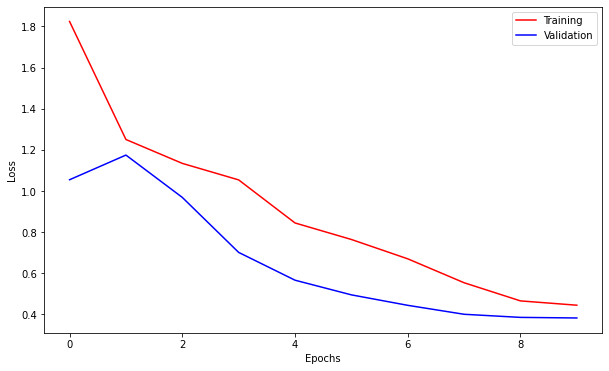

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

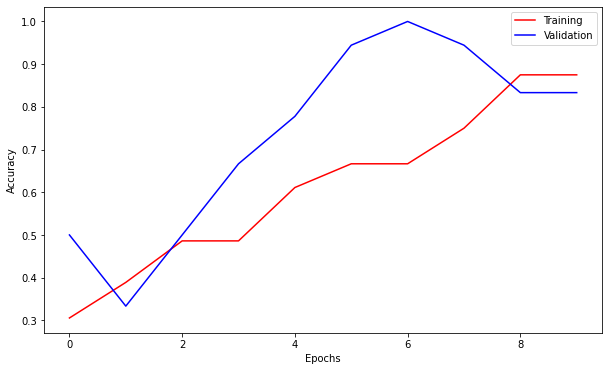

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
model.save('plant_disease')

INFO:tensorflow:Assets written to: plant_disease/assets
